## Import Modules

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy.signal import savgol_filter
from pathlib import Path

DATA_DIR = Path('../data')

%matplotlib inline
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)

## Load Data

In [2]:
# Really convoluted method of reading in data due to package clashes 

# Dataframe for lobedata
lobe_data_w_vinegar = pd.read_hdf(DATA_DIR / 'experiments_summary.h5')

# Numpy array for df_fs
file = h5py.File(DATA_DIR / 'experiments_summary.h5', 'r')
df_fs = file['df_fs'][:] # numpy ndarray

In [3]:
file.keys()

<KeysViewHDF5 ['df_fs', 'lobe_summary']>

In [7]:
# Collect data into a preliminary df
lobe_activities = np.row_stack(df_fs)
lobe_data_w_vinegar["df_f"] = np.mean(lobe_activities[:, 31:35], 1)
lobe_data_w_vinegar["ΔF/F"] = np.mean(lobe_activities[:, 31:35], 1)
lobe_data_w_vinegar["pre_ΔF/F"] = np.mean(np.abs(lobe_activities[:, 6:30]),1)

lobe_data_w_vinegar.head()

,experiment_id,stimulus,valence,dorsal_to_ventral,hours_starved,order_presented,virgin,lobe,adaptation,pre_std,single_pre_std,single_pre_amp,response_std,fly_id,fly_day_id,mated_single,df_mean,df_f,ΔF/F,pre_ΔF/F
0,TH-58E02_090816_Citronella,Citronella,-1.0,True,0,0,False,a1,0.007500,0.030948,0.170519,0.131845,0.181160,2016-08-09 00:00:000,0,NaN,0.341723,0.341723,0.341723,0.021723
1,TH-58E02_090816_Citronella,Citronella,-1.0,True,0,0,False,a2,-0.010356,0.020711,0.159267,0.217365,0.157602,2016-08-09 00:00:000,0,NaN,0.230774,0.230774,0.230774,0.017802
2,TH-58E02_090816_Citronella,Citronella,-1.0,True,0,0,False,a3,-0.027494,0.026490,0.115774,0.135316,0.343259,2016-08-09 00:00:000,0,NaN,1.023435,1.023435,1.023435,0.020086
3,TH-58E02_090816_Citronella,Citronella,-1.0,True,0,0,False,ap1,0.026010,0.041217,0.189557,0.139339,0.258084,2016-08-09 00:00:000,0,NaN,0.476658,0.476658,0.476658,0.028166
4,TH-58E02_090816_Citronella,Citronella,-1.0,True,0,0,False,ap2,0.000798,0.041212,0.239678,0.180607,0.268255,2016-08-09 00:00:000,0,NaN,0.412485,0.412485,0.412485,0.034686


### Refine the DF

In [8]:
lobe_data_w_vinegar = lobe_data_w_vinegar.replace("1-Heptanone",'2-Heptanone')

In [9]:
Lobes = lobe_data_w_vinegar.lobe.unique()
print(f'Lobes: {Lobes}')

LobesGreek=['α1', 'α2', 'α3', "α'1", "α'2", "α'3", 'β1', 'β2', "β'1", "β'2",
       'γ1', 'γ2', 'γ3', 'γ4', 'γ5']

dictionaryGreek = dict(zip(Lobes, LobesGreek))

lobe_data_w_vinegar["greek_lobe"] = [dictionaryGreek[l] for l in lobe_data_w_vinegar.lobe]

Lobes: ['a1' 'a2' 'a3' 'ap1' 'ap2' 'ap3' 'b1' 'b2' 'bp1' 'bp2' 'g1' 'g2' 'g3'
 'g4' 'g5']


In [10]:
# Add hours starved col
lobe_data_w_vinegar["hours starved"] = lobe_data_w_vinegar["hours_starved"]

In [11]:
# Add valence column (1, -1, np.nan)

valence_map = {
    "high_Vinegar": np.nan,
    "Vinegar": '1',
    "Yeast": '1',
    "Isoamylacetate": np.nan,
    "2-Heptanone": np.nan,
    "1-Heptanone": np.nan,
    "cVA": np.nan,
    "3Octanol": '-1',
    "Ethanol": np.nan,
    "1-Hexanol": np.nan,
    "Peppermint": '-1',
    "4MCH": '-1',
    "Citronella": '-1',
    "Geosmin": '-1',
}

lobe_data_w_vinegar["valence"] = [valence_map[s] for s in lobe_data_w_vinegar.stimulus]

In [12]:
lobe_data_w_vinegar.head()

,experiment_id,stimulus,valence,dorsal_to_ventral,hours_starved,order_presented,virgin,lobe,adaptation,pre_std,...,response_std,fly_id,fly_day_id,mated_single,df_mean,df_f,ΔF/F,pre_ΔF/F,greek_lobe,hours starved
0,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a1,0.007500,0.030948,...,0.181160,2016-08-09 00:00:000,0,NaN,0.341723,0.341723,0.341723,0.021723,α1,0
1,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a2,-0.010356,0.020711,...,0.157602,2016-08-09 00:00:000,0,NaN,0.230774,0.230774,0.230774,0.017802,α2,0
2,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a3,-0.027494,0.026490,...,0.343259,2016-08-09 00:00:000,0,NaN,1.023435,1.023435,1.023435,0.020086,α3,0
3,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,ap1,0.026010,0.041217,...,0.258084,2016-08-09 00:00:000,0,NaN,0.476658,0.476658,0.476658,0.028166,α'1,0
4,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,ap2,0.000798,0.041212,...,0.268255,2016-08-09 00:00:000,0,NaN,0.412485,0.412485,0.412485,0.034686,α'2,0


### Remove 'high vinegar' from the df and SAVE THE DF

In [17]:
lobe_data_w_vinegar.to_pickle(DATA_DIR / 'siju.pkl')

In [14]:
lobe_data = lobe_data_w_vinegar[lobe_data_w_vinegar["stimulus"] != "high_Vinegar"]

# Plot all the data

IMportant cols:

greek_lobe
∆F/F


### Visualise DAN activity in each lobe

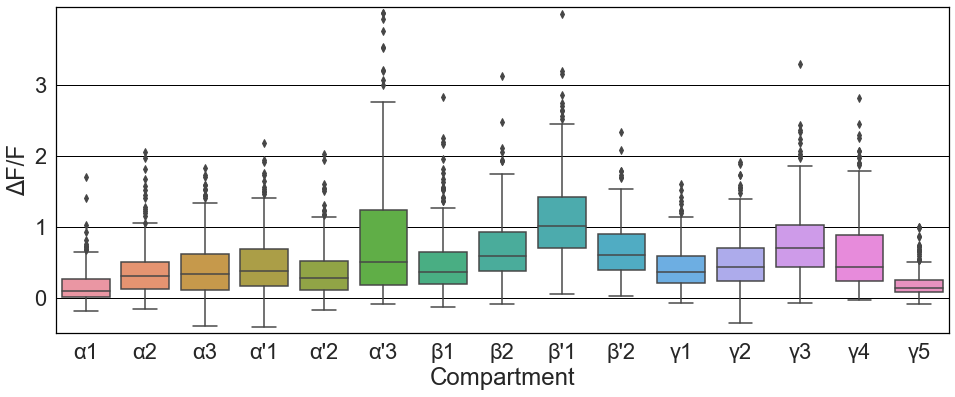

In [38]:
plt.figure(figsize=(16, 6))
b = sns.boxplot(x="greek_lobe", y="ΔF/F",data=lobe_data)
b.set(xlabel='Compartment')

plt.yticks([0,1,2,3])  
plt.ylim([-0.5,4.1])
plt.show()
# plt.savefig('AllLobesDFF.svg')

### Visualise DAN activity for each stimulus

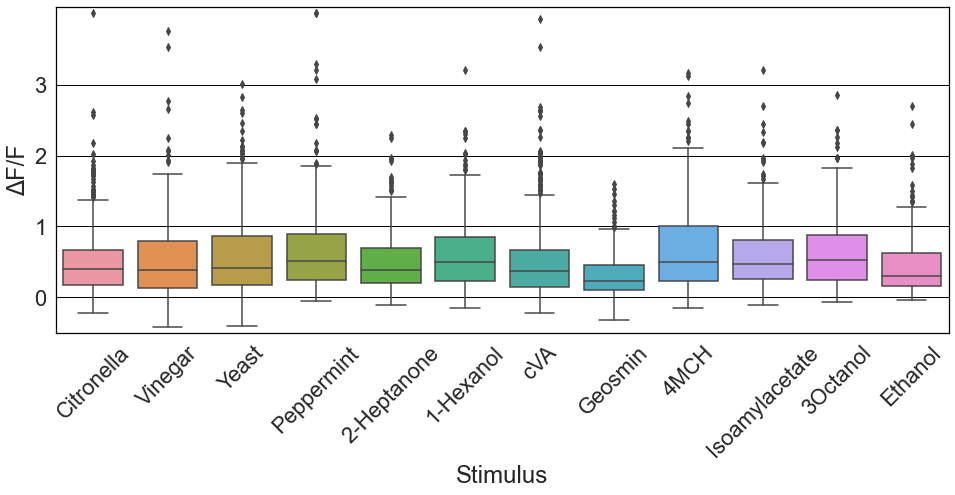

In [40]:
plt.figure(figsize=(16, 6))
b = sns.boxplot(x="stimulus", y="ΔF/F",data=lobe_data)
b.set(xlabel='Stimulus')

plt.yticks([0,1,2,3])  
plt.ylim([-0.5,4.1])
b.set_xticklabels(b.get_xticklabels(),rotation=45)
plt.show()
# plt.savefig('AllStimuliDFF.svg')

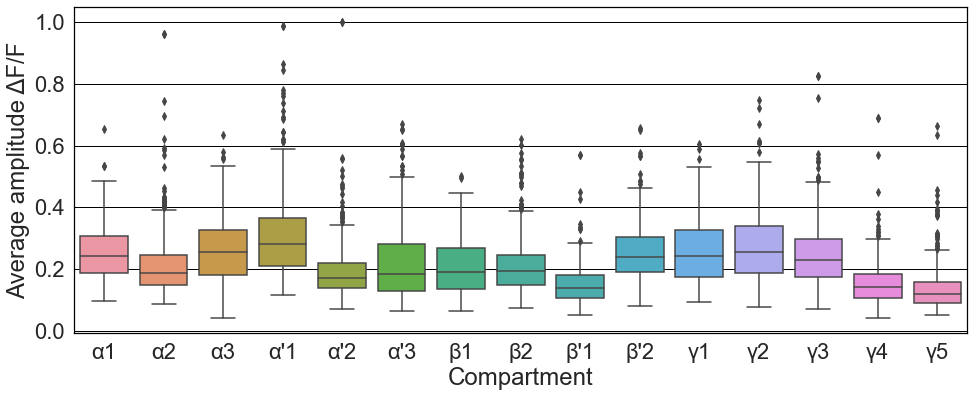

In [61]:
plt.figure(figsize=(16, 6))
b = sns.boxplot(x="greek_lobe", y="single_pre_amp",data=lobe_data)
b.set(xlabel='Compartment',ylabel='Average amplitude ΔF/F')
plt.show()
# plt.savefig('LobesAvpreAmplNew.svg')

In [74]:
# Quick way
by_lobe = lobe_data.groupby(["greek_lobe"])
response_std = by_lobe["df_f"].std()
preamp_std = by_lobe["pre_ΔF/F"].std()


# Really non-pythonic way
Response_std = np.zeros((15))
for i in range(15):
    Response_std[i] = np.std(lobe_data[lobe_data["lobe"] == Lobes[i]]["df_f"])

Preamp_std=np.zeros((15))
for i in range(15):
    Preamp_std[i]=np.std(lobe_data[lobe_data["lobe"]==Lobes[i]]["pre_ΔF/F"])

In [56]:
lobe_data.columns

Index(['experiment_id', 'stimulus', 'valence', 'dorsal_to_ventral',
       'hours_starved', 'order_presented', 'virgin', 'lobe', 'adaptation',
       'pre_std', 'single_pre_std', 'single_pre_amp', 'response_std', 'fly_id',
       'fly_day_id', 'mated_single', 'df_mean', 'df_f', 'ΔF/F', 'pre_ΔF/F',
       'greek_lobe', 'hours starved'],
      dtype='object')

In [69]:
preamp_std.index

Index(['a1', 'a2', 'a3', 'ap1', 'ap2', 'ap3', 'b1', 'b2', 'bp1', 'bp2', 'g1',
       'g2', 'g3', 'g4', 'g5'],
      dtype='object', name='lobe')

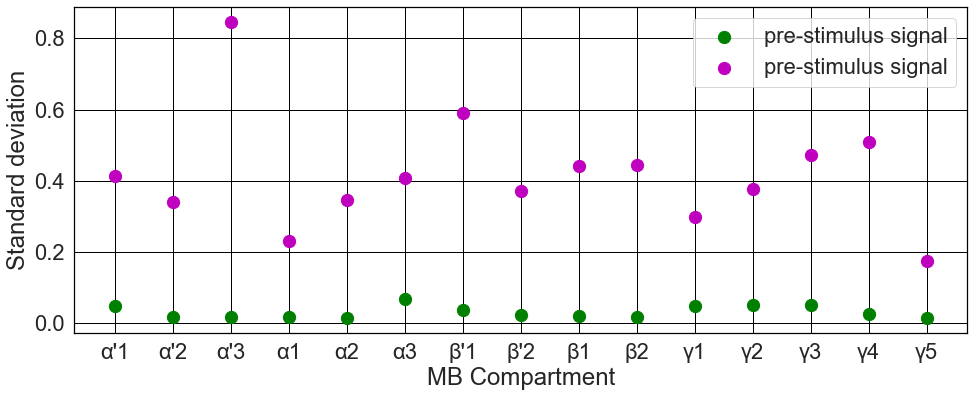

In [77]:

plt.figure(figsize=(16, 6))
plt.scatter(preamp_std.index, preamp_std, c='g', marker='o',s=150,label='pre-stimulus signal')
plt.scatter(response_std.index, response_std, c='m', marker='o',s=150,label='pre-stimulus signal')

plt.xlabel('MB Compartment')
plt.ylabel('Standard deviation')
plt.legend()

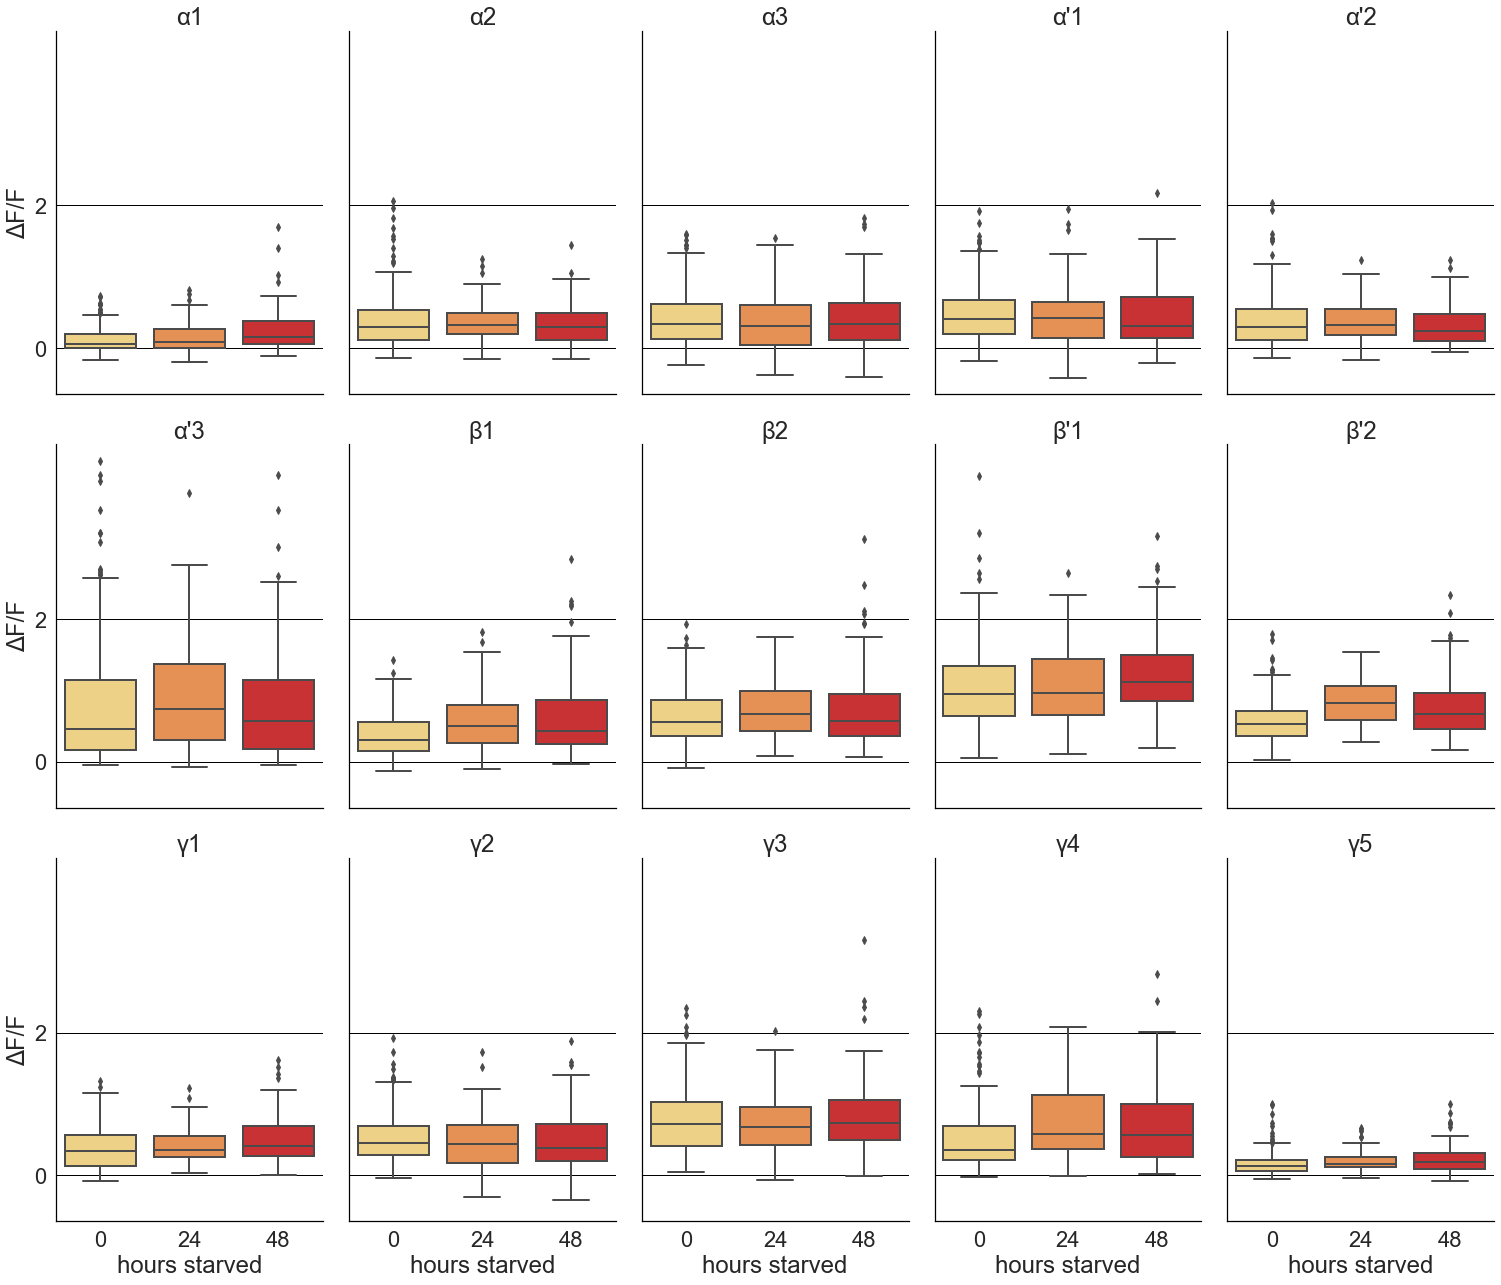

In [78]:
b = sns.catplot(x="hours starved", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data, linewidth=2, kind="box",palette='YlOrRd',height=6, aspect=.7)

#.set_titles("{col_name} {col_var}")
#b.set(xlabel="hours starved")
#b.set(ylabel="ΔF/F")
b.set_titles("{col_name}") # set new labels
plt.yticks([0,2])

plt.savefig('LobesStarvation.svg')

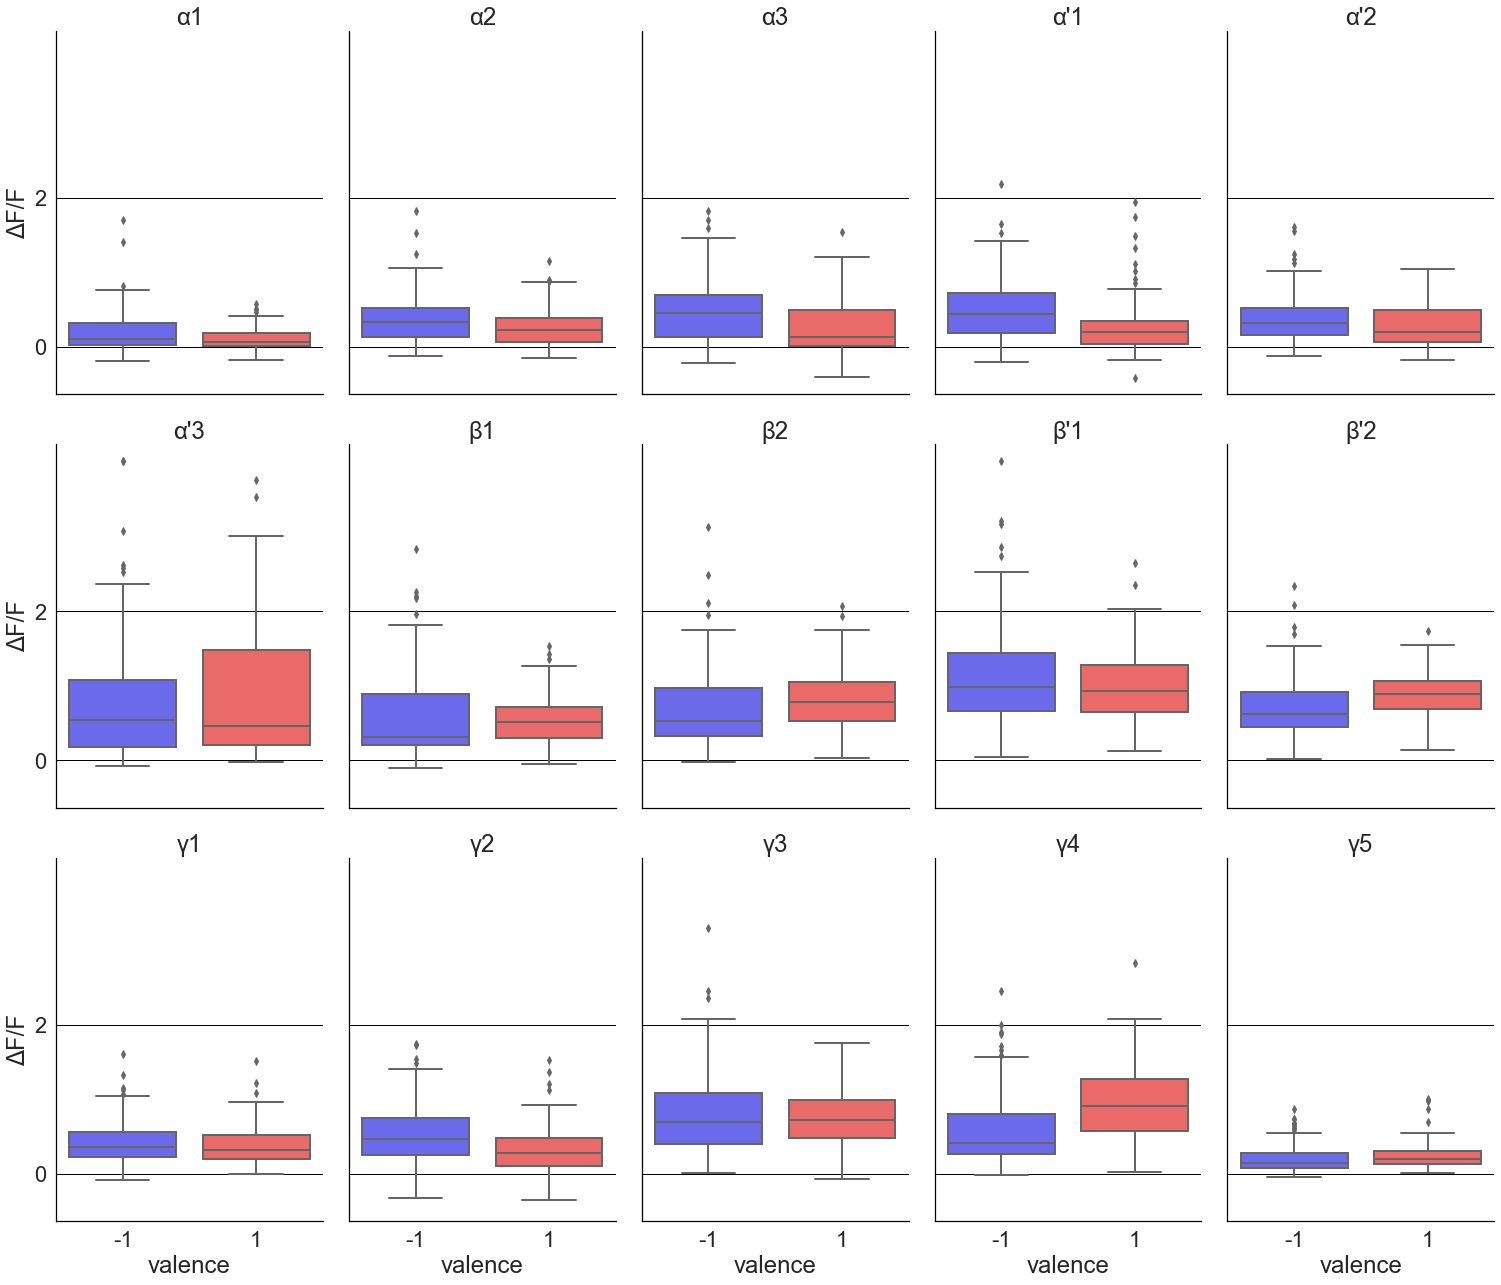

In [79]:
b = sns.catplot(x="valence", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data,palette='seismic',linewidth=2, kind="box",height=6, aspect=.7)

b.set_titles("{col_name}") # set new labels
plt.yticks([0,2])
plt.savefig('LobesValence.svg')


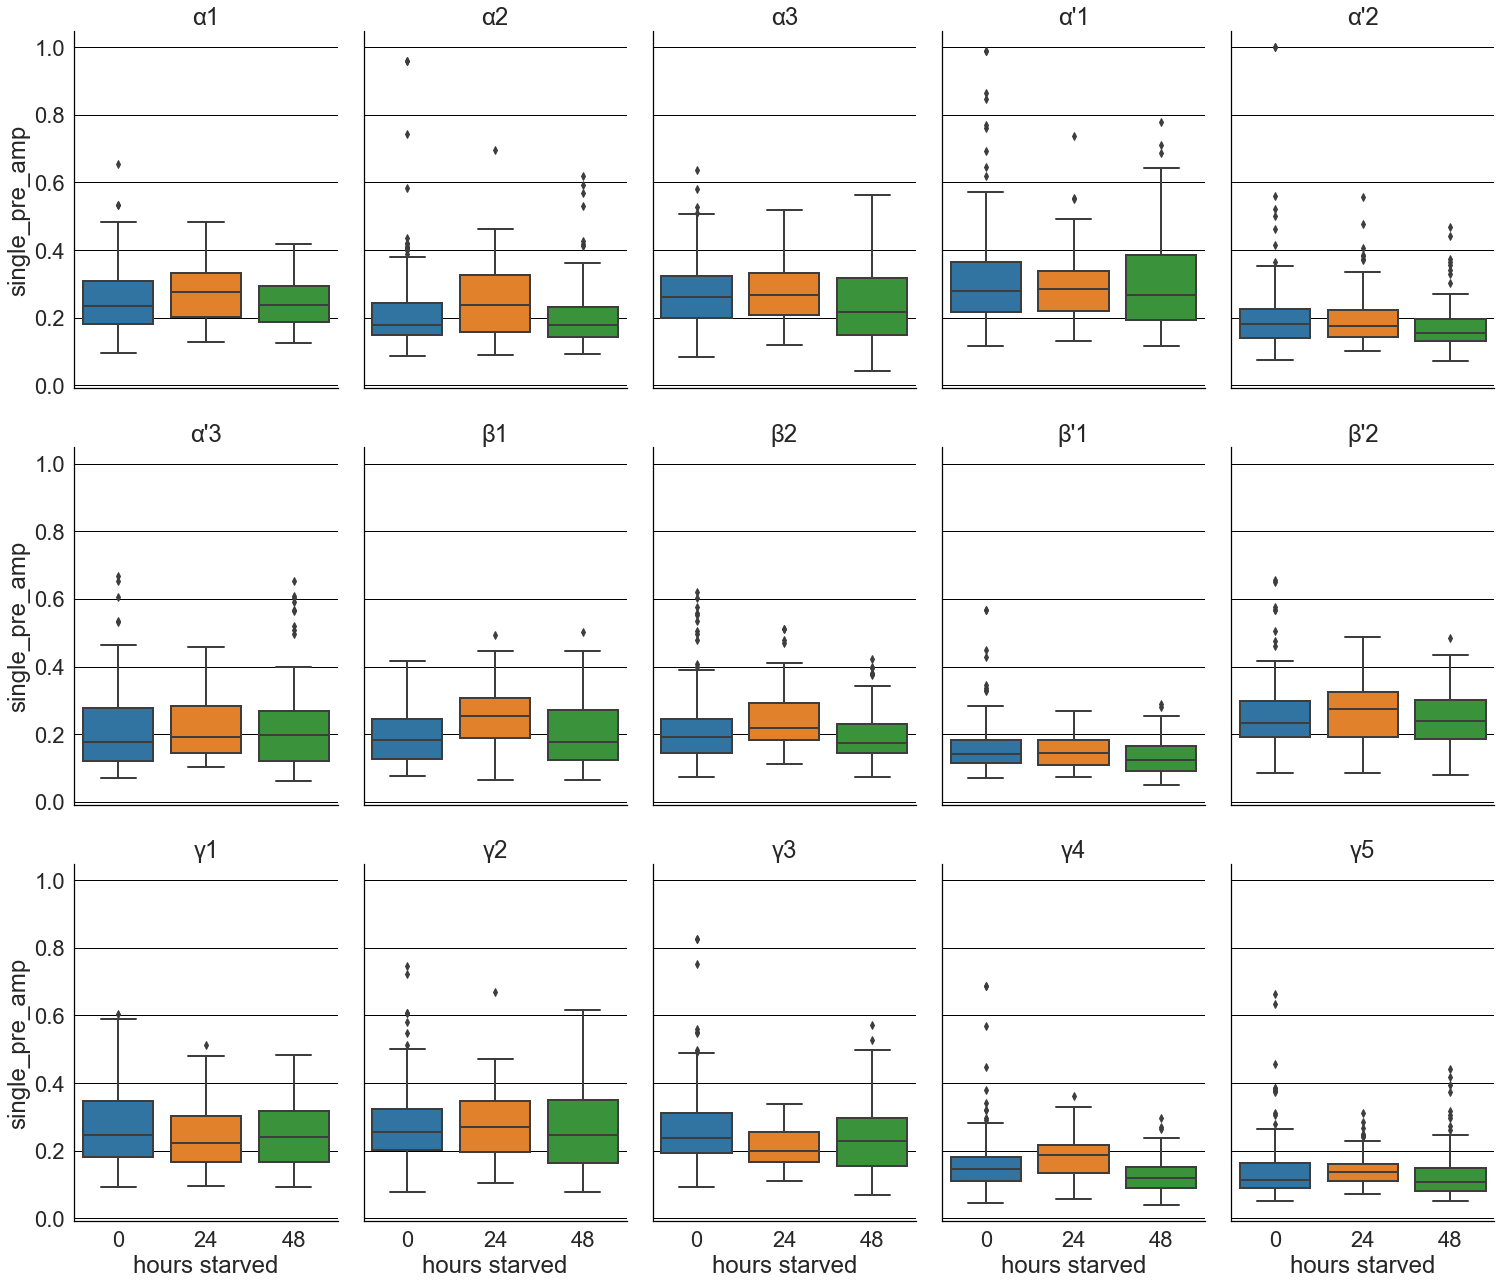

In [80]:
b = sns.catplot(x="hours starved", y="single_pre_amp", col="greek_lobe",col_wrap=5,data=lobe_data,linewidth=2, kind="box",height=6, aspect=.7)

b.set_titles("{col_name}") # set new labels
plt.yticks()
plt.savefig('SpontaneousStarvation.svg')
plt.savefig('SpontaneousStarvation.png')

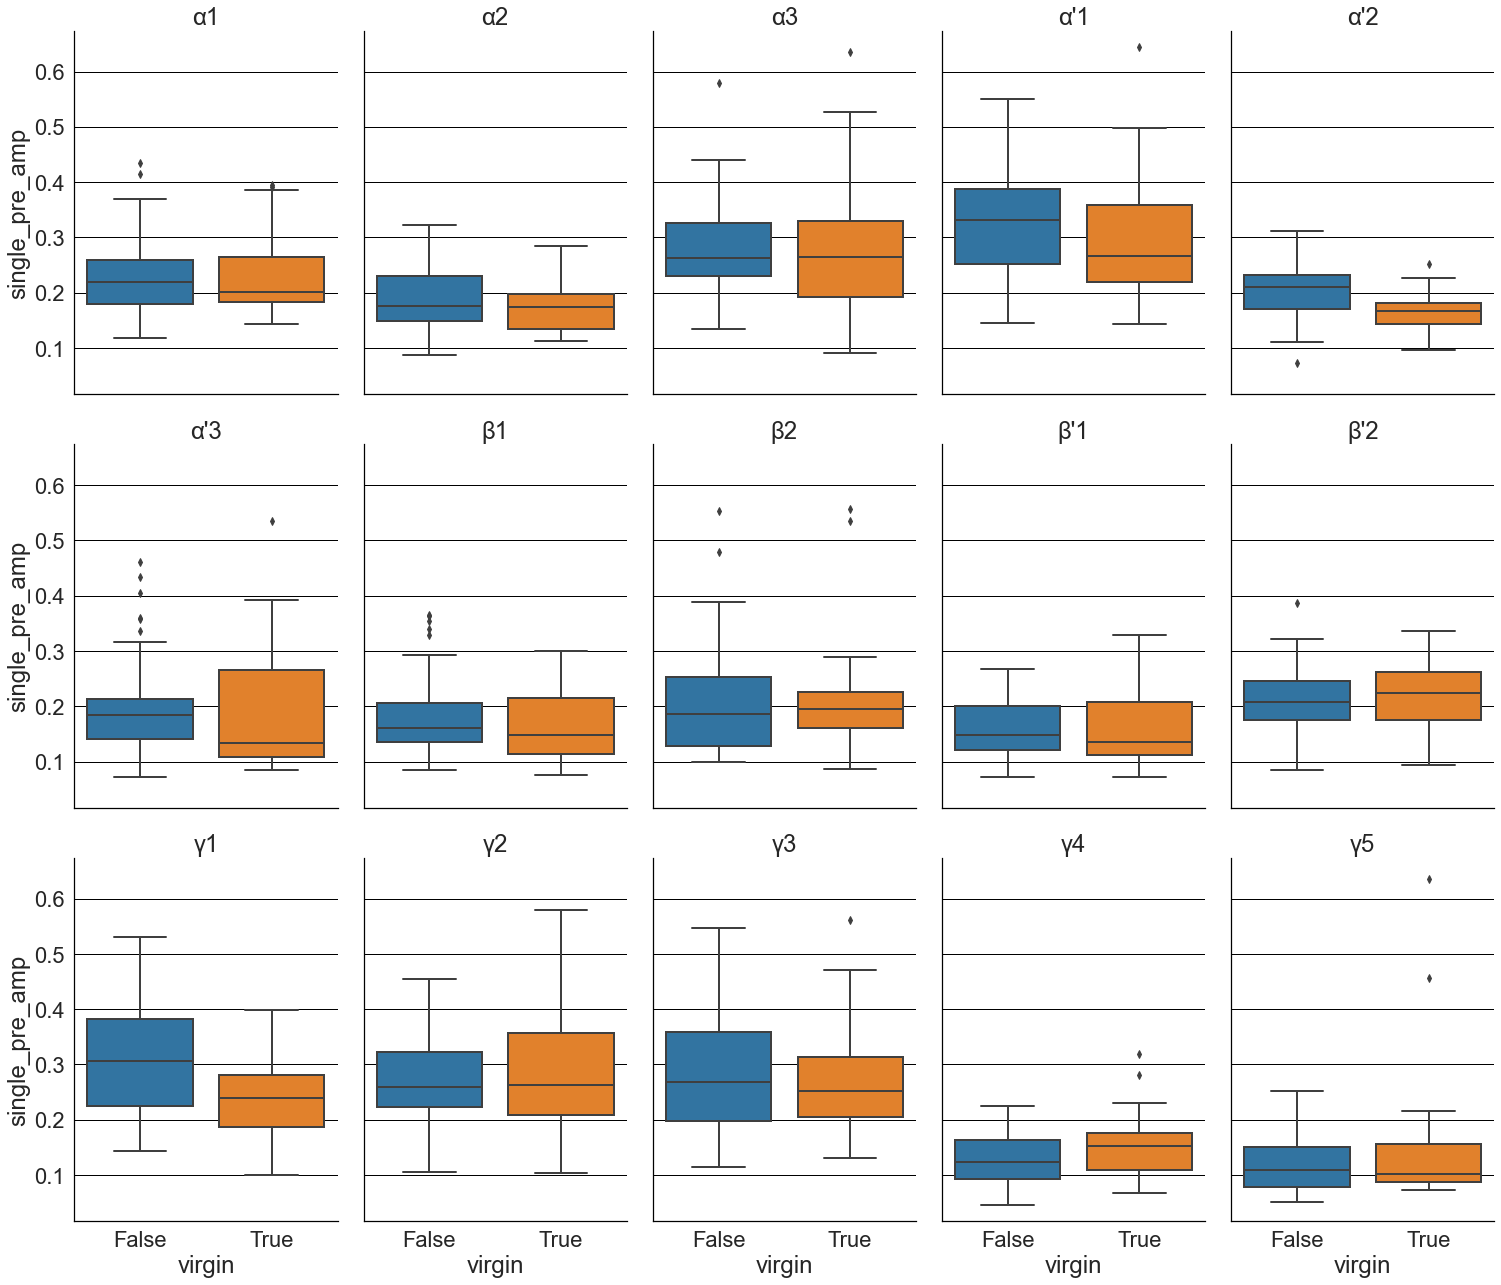

In [81]:
b = sns.catplot(x="virgin", y="single_pre_amp", col="greek_lobe",col_wrap=5,data=lobe_data[lobe_data['stimulus']=='cVA'],linewidth=2, kind="box",height=6, aspect=.7)

b.set_titles("{col_name}") # set new labels
#plt.yticks([0,0.2])
plt.savefig('SpontaneousMated.svg')
plt.savefig('SpontaneousMated.png')

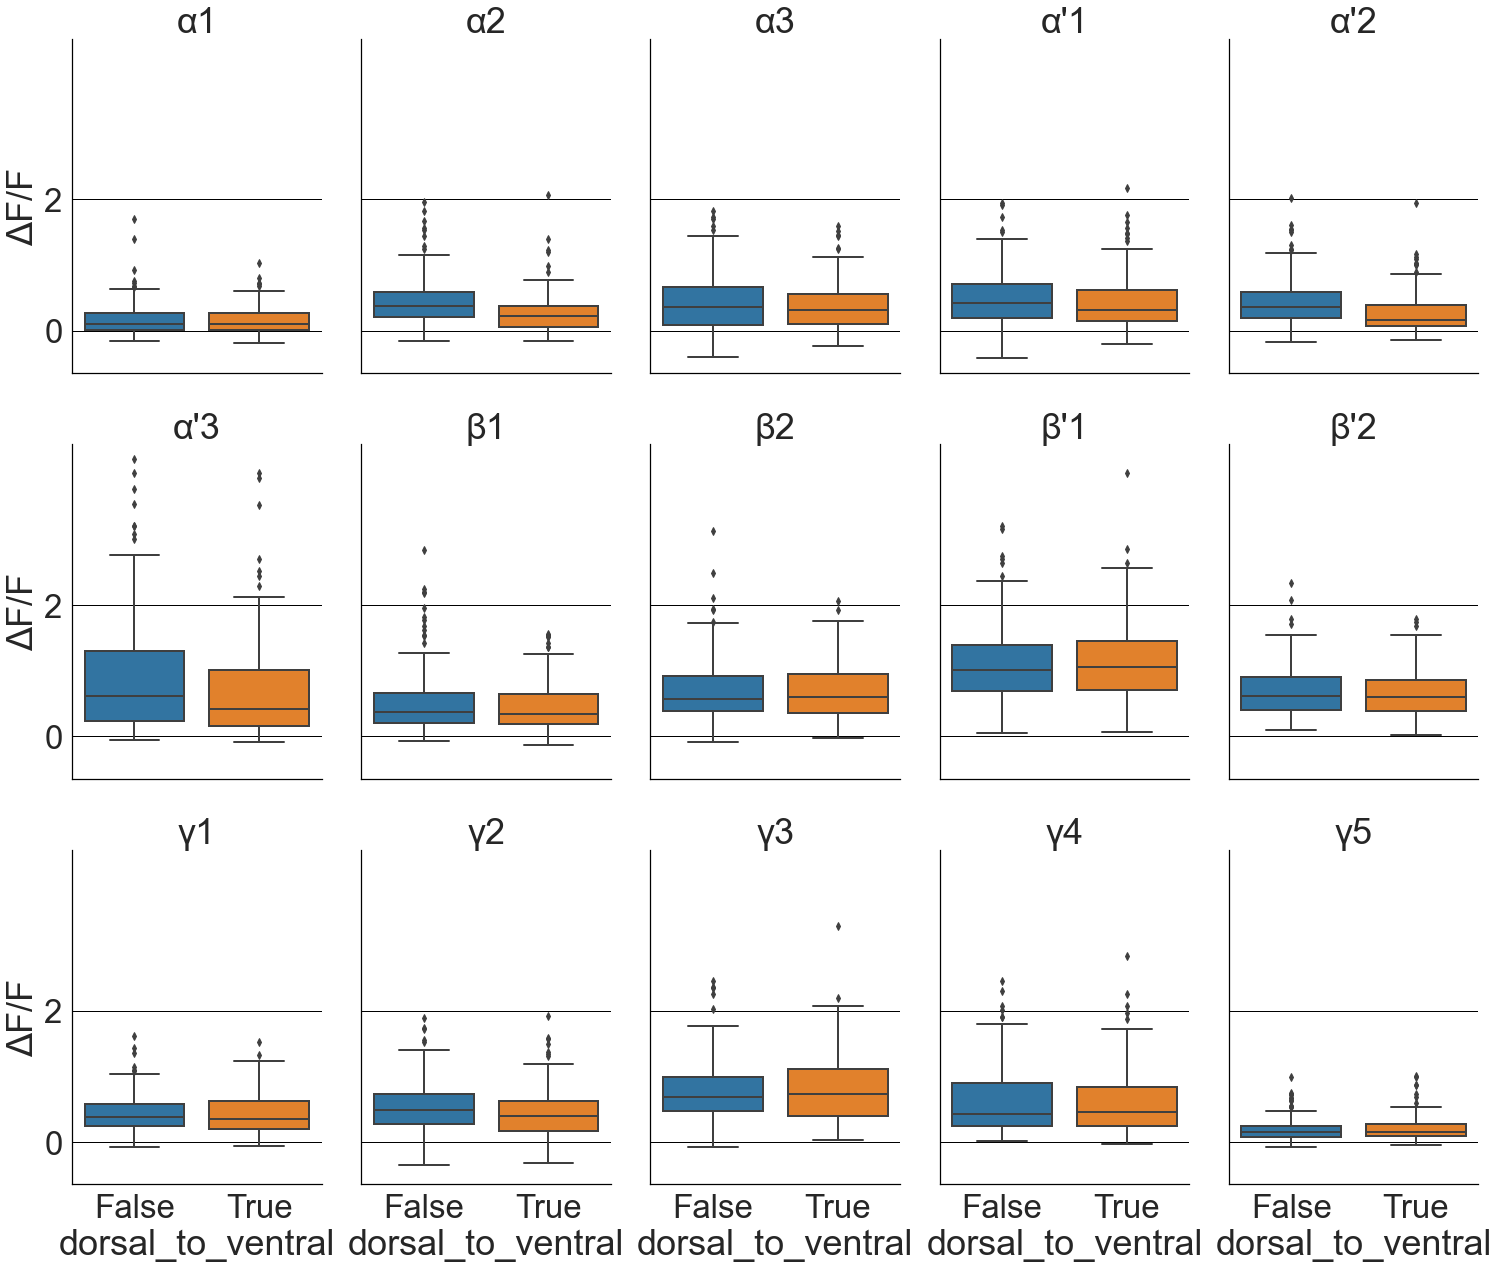

In [82]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=3)

b = sns.catplot(x="dorsal_to_ventral", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data,linewidth=2, kind="box",height=6, aspect=.7)

b.set_titles("{col_name}") # set new labels
plt.yticks([0,2])
plt.savefig('LobesDirection.svg')
plt.savefig('LobesDirection.png')

In [83]:
lobe_data["adaptnorm"] = -lobe_data.adaptation/lobe_data.df_mean

lobe_data.adaptnorm[lobe_data.df_mean<0.3]=np.nan

/anaconda3/envs/comp-neuro/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/comp-neuro/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/comp-neuro/lib/python3.7/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [84]:
lobe_data["adaptnormperc"]=lobe_data.adaptnorm*100

/anaconda3/envs/comp-neuro/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


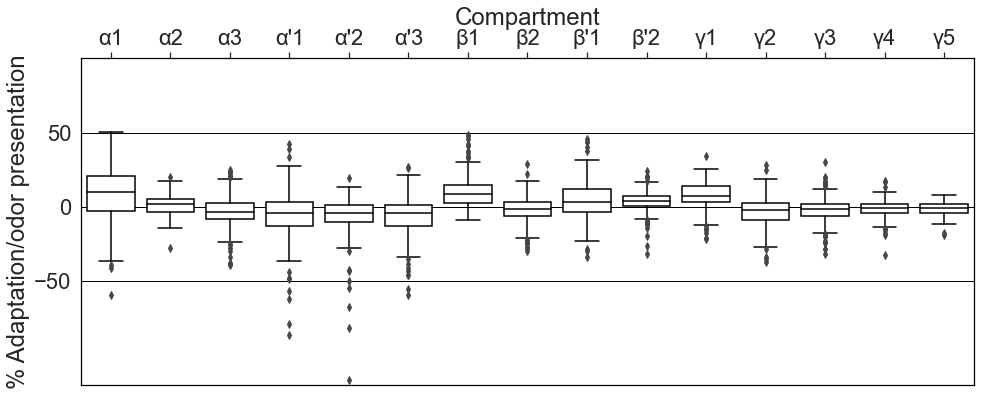

In [85]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
b = sns.boxplot(x="greek_lobe", y="adaptnormperc",data=lobe_data)
b.set(xlabel='Compartment',ylabel='% Adaptation/odor presentation')

for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
b.xaxis.set_ticks_position('top')
b.xaxis.set_label_position('top')
b.set(ylim=(-120, 100))
plt.yticks([-50, 0,50])
plt.savefig('Adaptation.svg')            
plt.show()

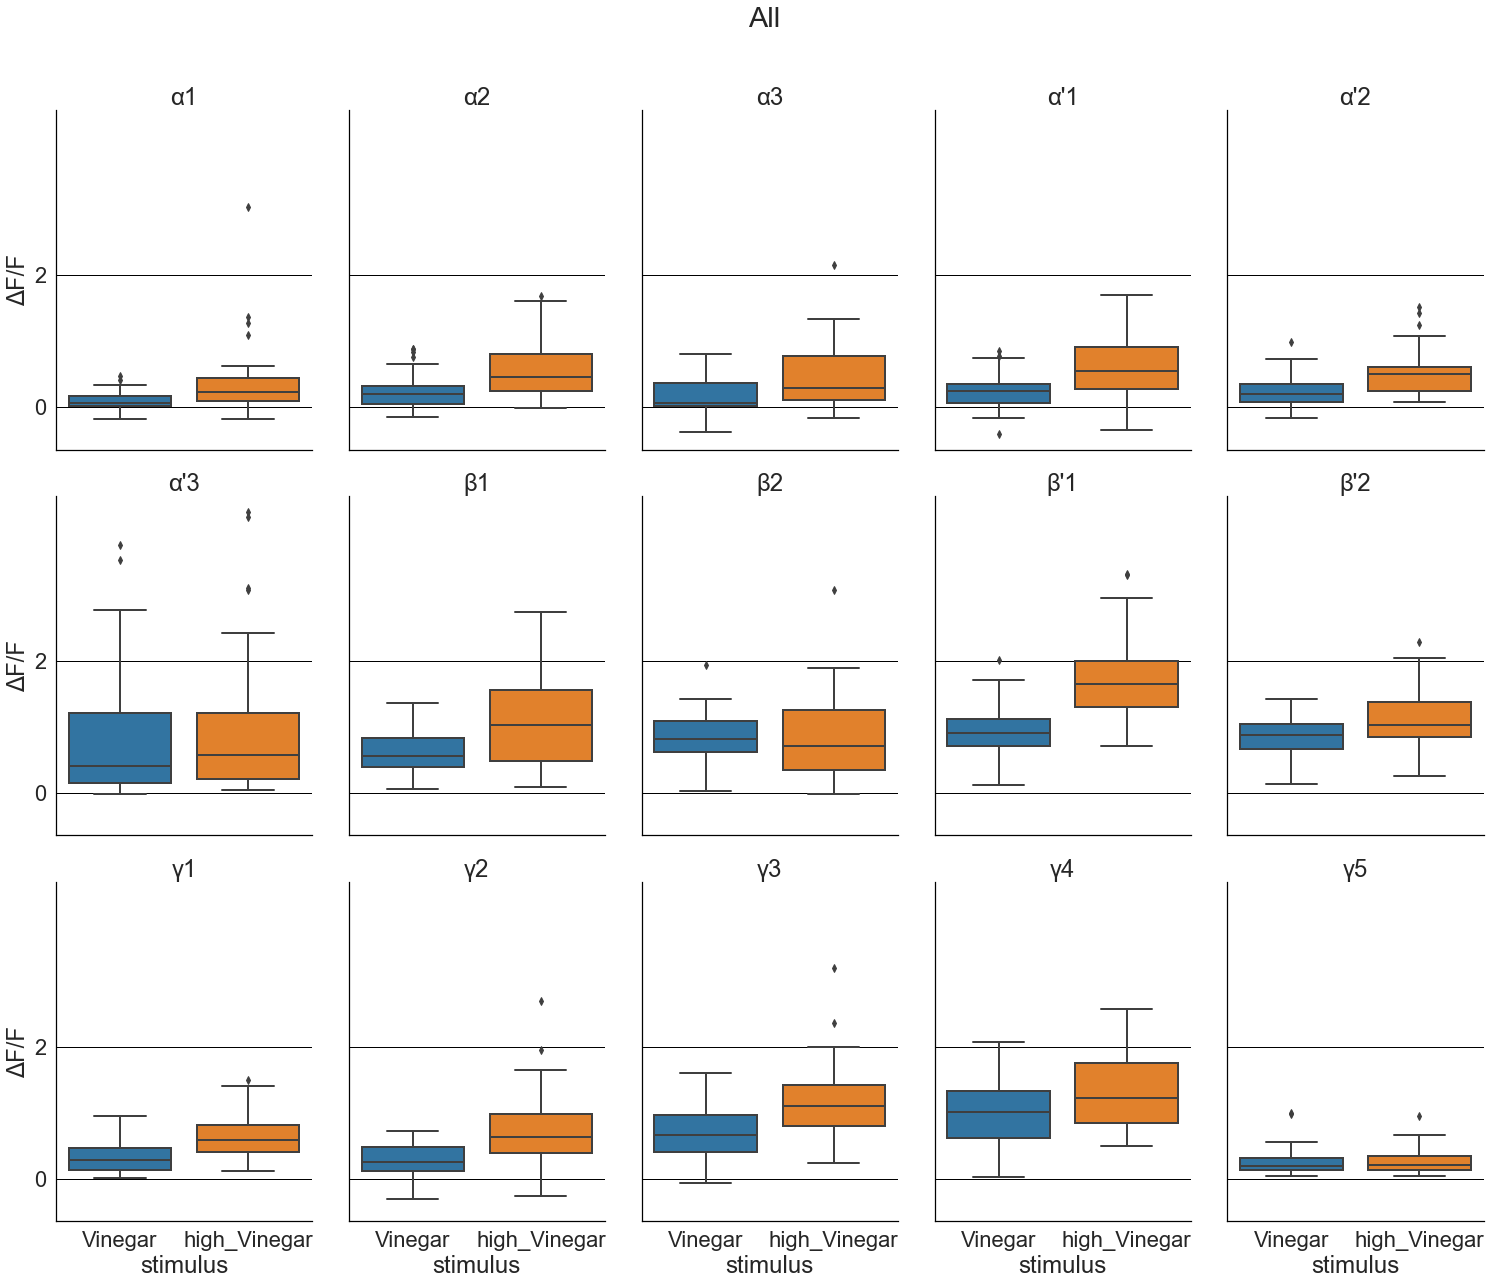

In [87]:
lobe_data_vin=lobe_data_w_vinegar[lobe_data_w_vinegar.stimulus.isin({"Vinegar","high_Vinegar"})]
lobe_data_vin_starved=lobe_data_vin[lobe_data_vin.hours_starved.isin({24,48})]

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=2)


b = sns.catplot(x="stimulus", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data_vin,linewidth=2, height=6, aspect=.7,kind='box')

b.set_titles("{col_name}") # set new labels
plt.subplots_adjust(top=0.9)
b.fig.suptitle('All')
plt.yticks([0,2])
plt.savefig('LobesHighvsLowVinegar.svg')

/anaconda3/envs/comp-neuro/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/comp-neuro/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/comp-neuro/lib/python3.7/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

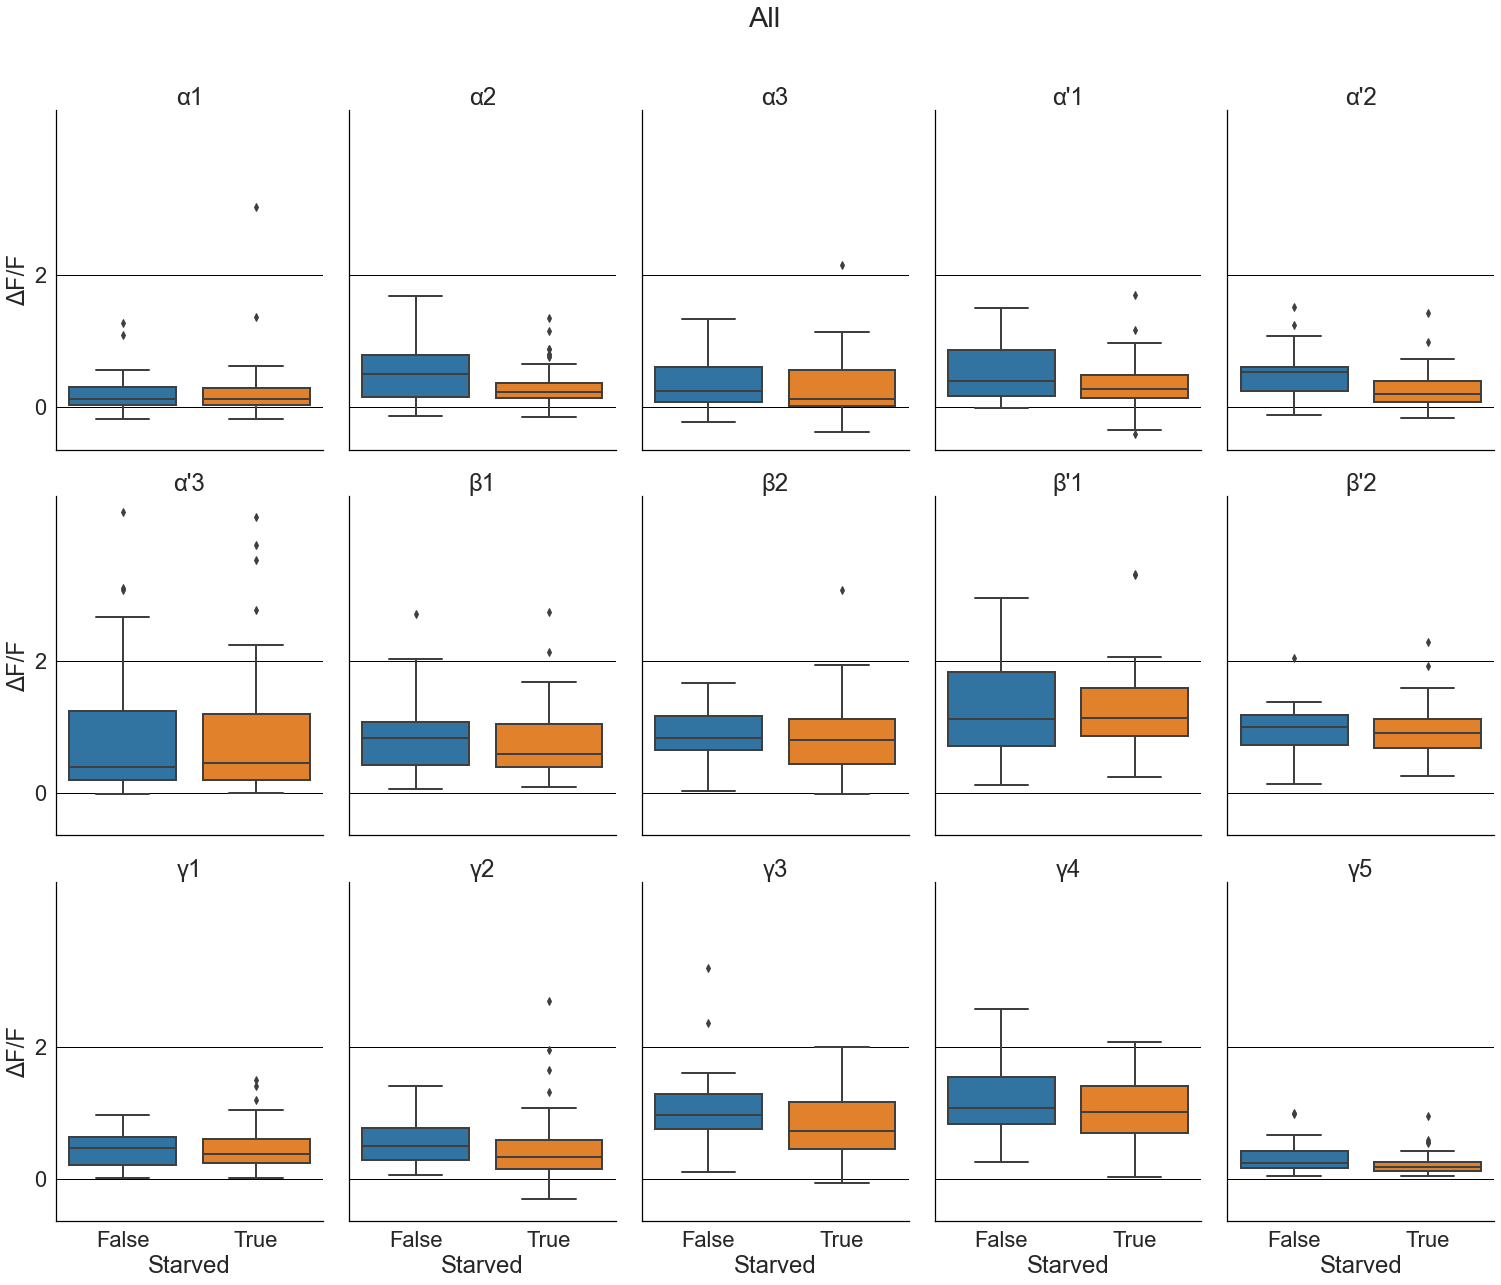

In [88]:
lobe_data_vin=lobe_data_w_vinegar[lobe_data_w_vinegar.stimulus.isin({"Vinegar","high_Vinegar"})]
lobe_data_vin_starved=lobe_data_vin[lobe_data_vin.hours_starved.isin({24,48})]
lobe_data_vin["Starved"]=True
lobe_data_vin["Starved"][lobe_data_vin.hours_starved==0]=False

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=2)


b = sns.catplot(x="Starved", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data_vin,linewidth=2, height=6, aspect=.7,kind='box')

b.set_titles("{col_name}") # set new labels
plt.subplots_adjust(top=0.9)
b.fig.suptitle('All')
plt.yticks([0,2])
plt.savefig('StarvedVsFedVinegar.svg')

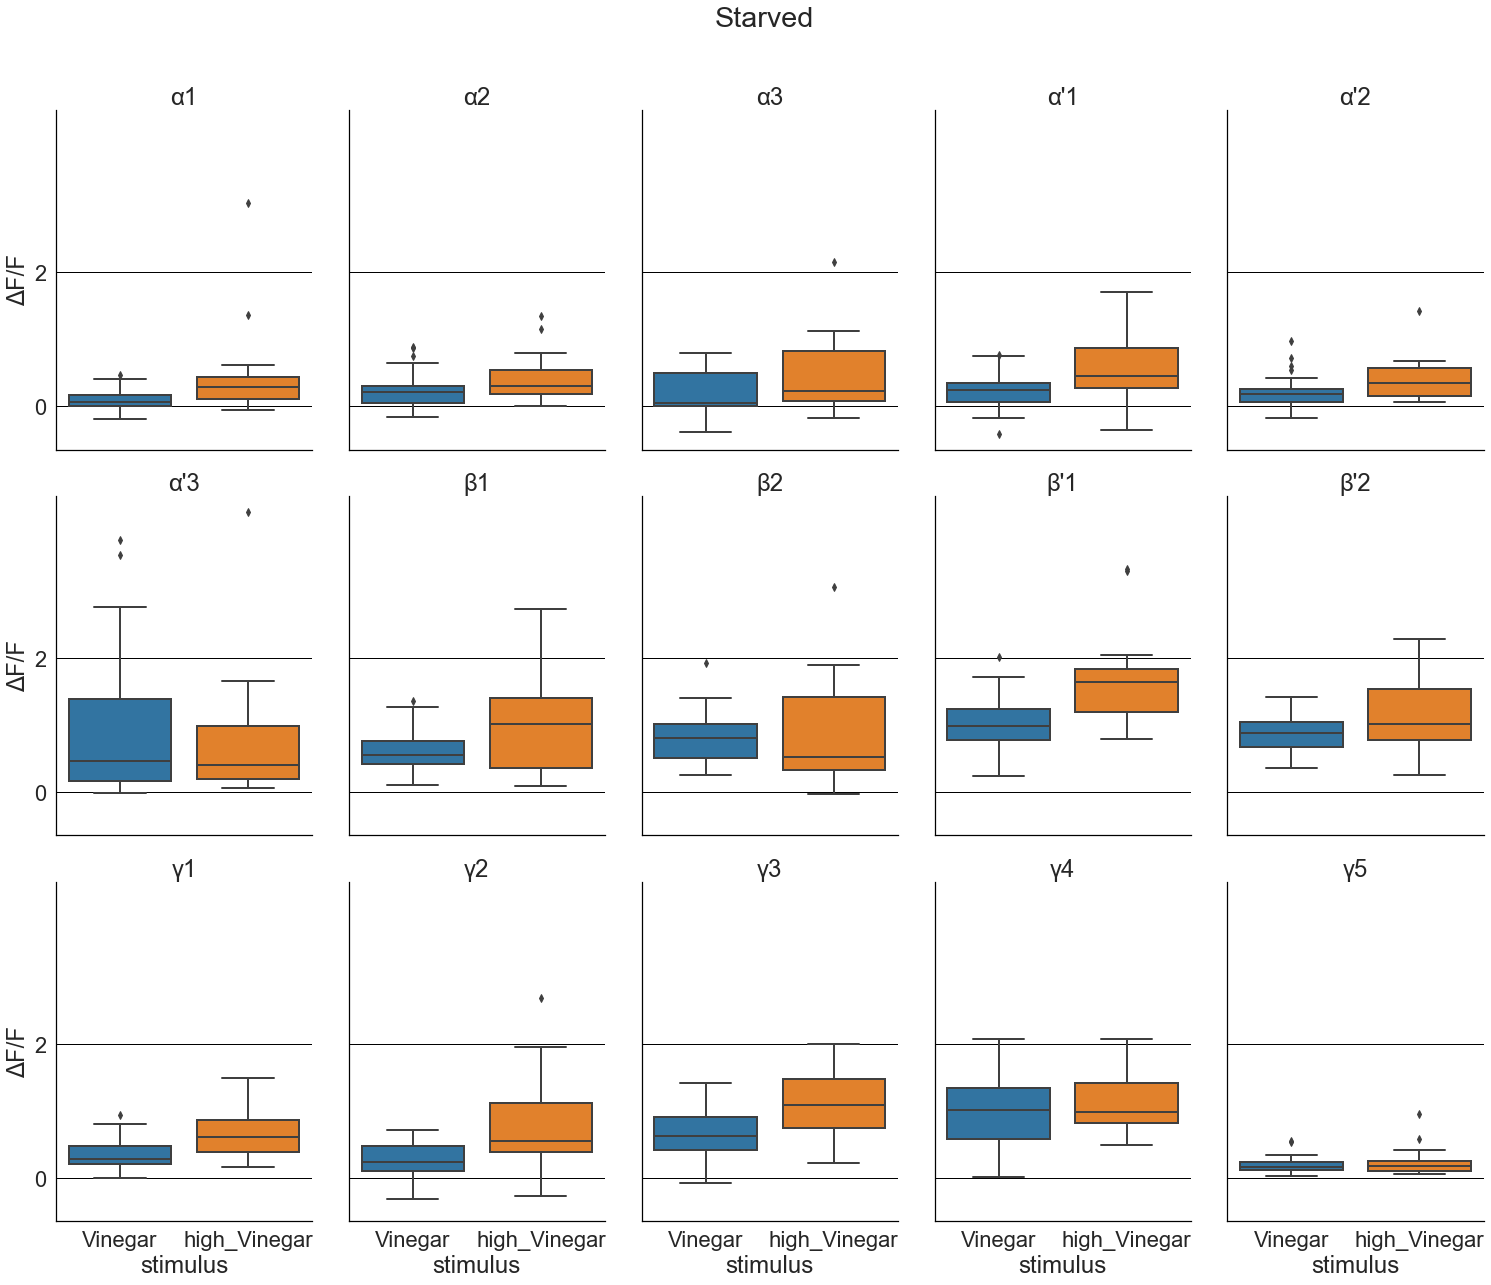

In [89]:
lobe_data_vin=lobe_data_w_vinegar[lobe_data_w_vinegar.stimulus.isin({"Vinegar","high_Vinegar"})]
lobe_data_vin_starved=lobe_data_vin[lobe_data_vin.hours_starved.isin({24,48})]

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=2)


b = sns.catplot(x="stimulus", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data_vin_starved,linewidth=2, height=6, aspect=.7,kind='box')

b.set_titles("{col_name}") # set new labels
plt.yticks([0,2])
plt.subplots_adjust(top=0.9)
b.fig.suptitle('Starved')
plt.savefig('LobesHighvsLowVinegarStarved.svg')

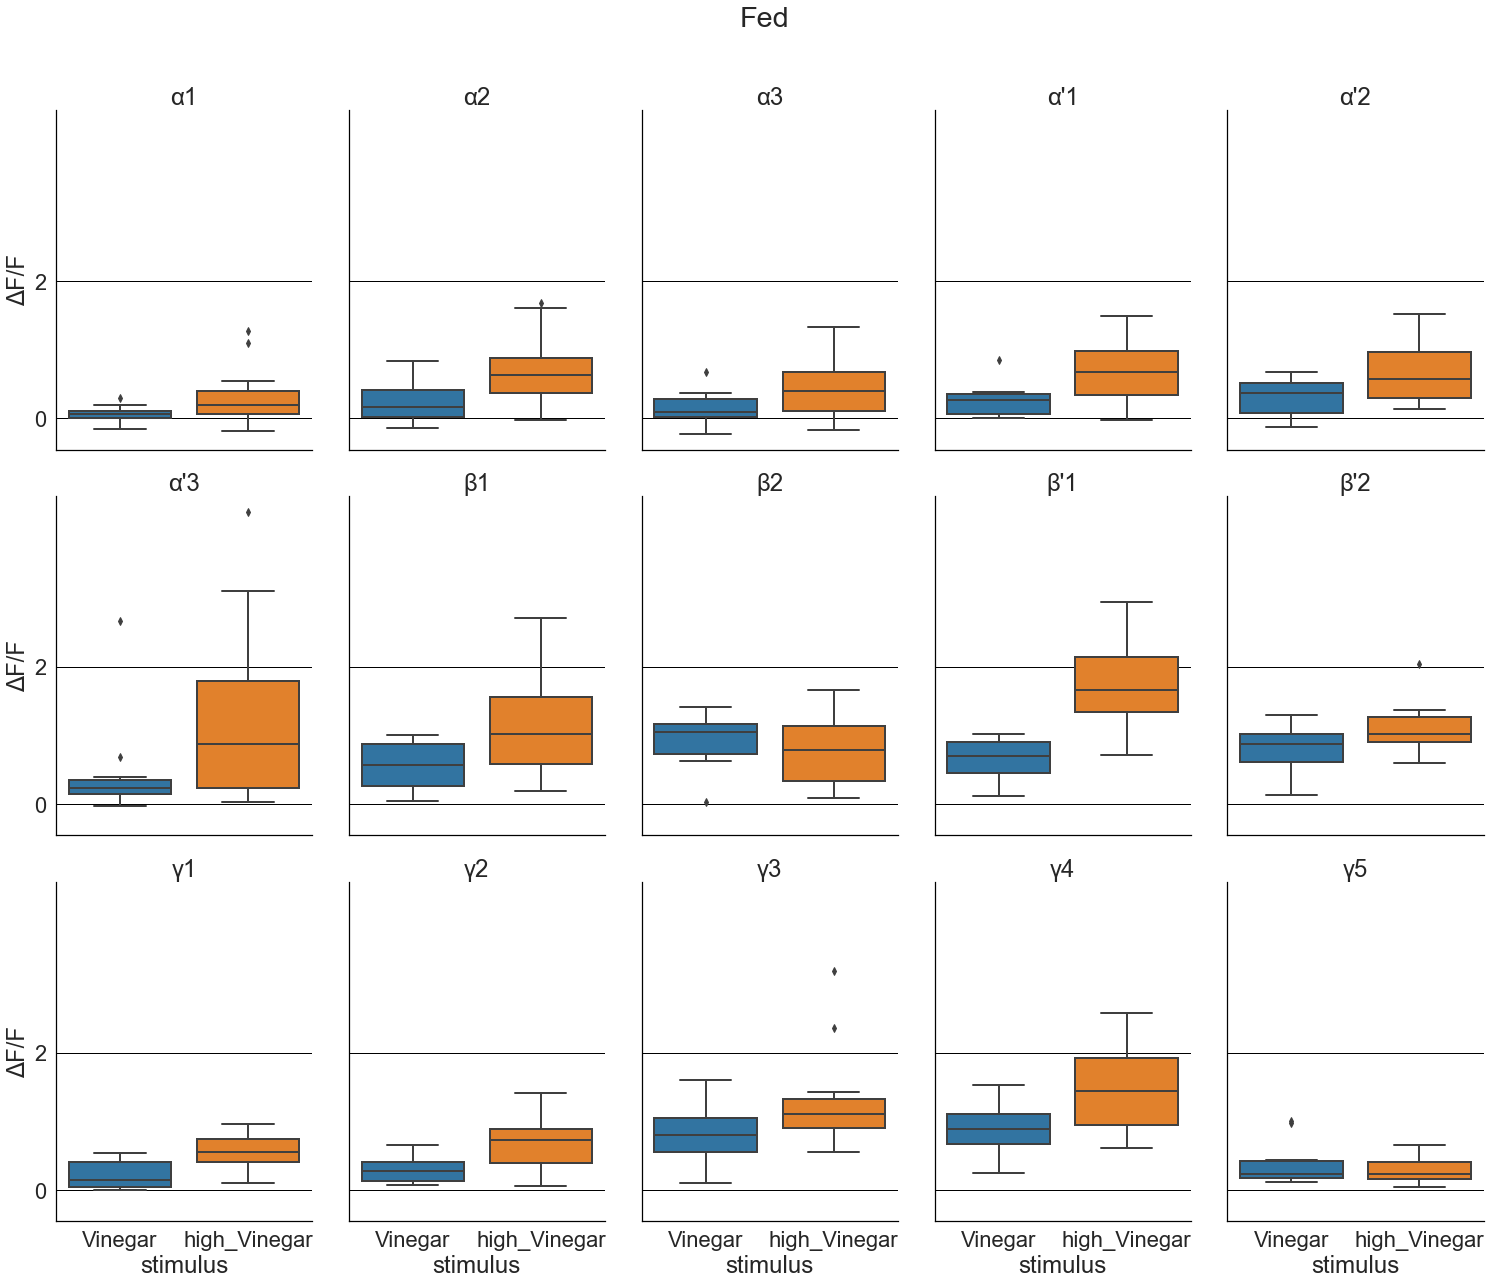

In [90]:
lobe_data_vin=lobe_data_w_vinegar[lobe_data_w_vinegar.stimulus.isin({"Vinegar","high_Vinegar"})]
lobe_data_vin_fed=lobe_data_vin[lobe_data_vin.hours_starved.isin({0})]

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=2)


b = sns.catplot(x="stimulus", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data_vin_fed,linewidth=2, height=6, aspect=.7,kind='box')

b.set_titles("{col_name}") # set new labels
plt.yticks([0,2])
plt.subplots_adjust(top=0.9)
b.fig.suptitle('Fed')
plt.savefig('LobesHighvsLowVinegarFed.svg')

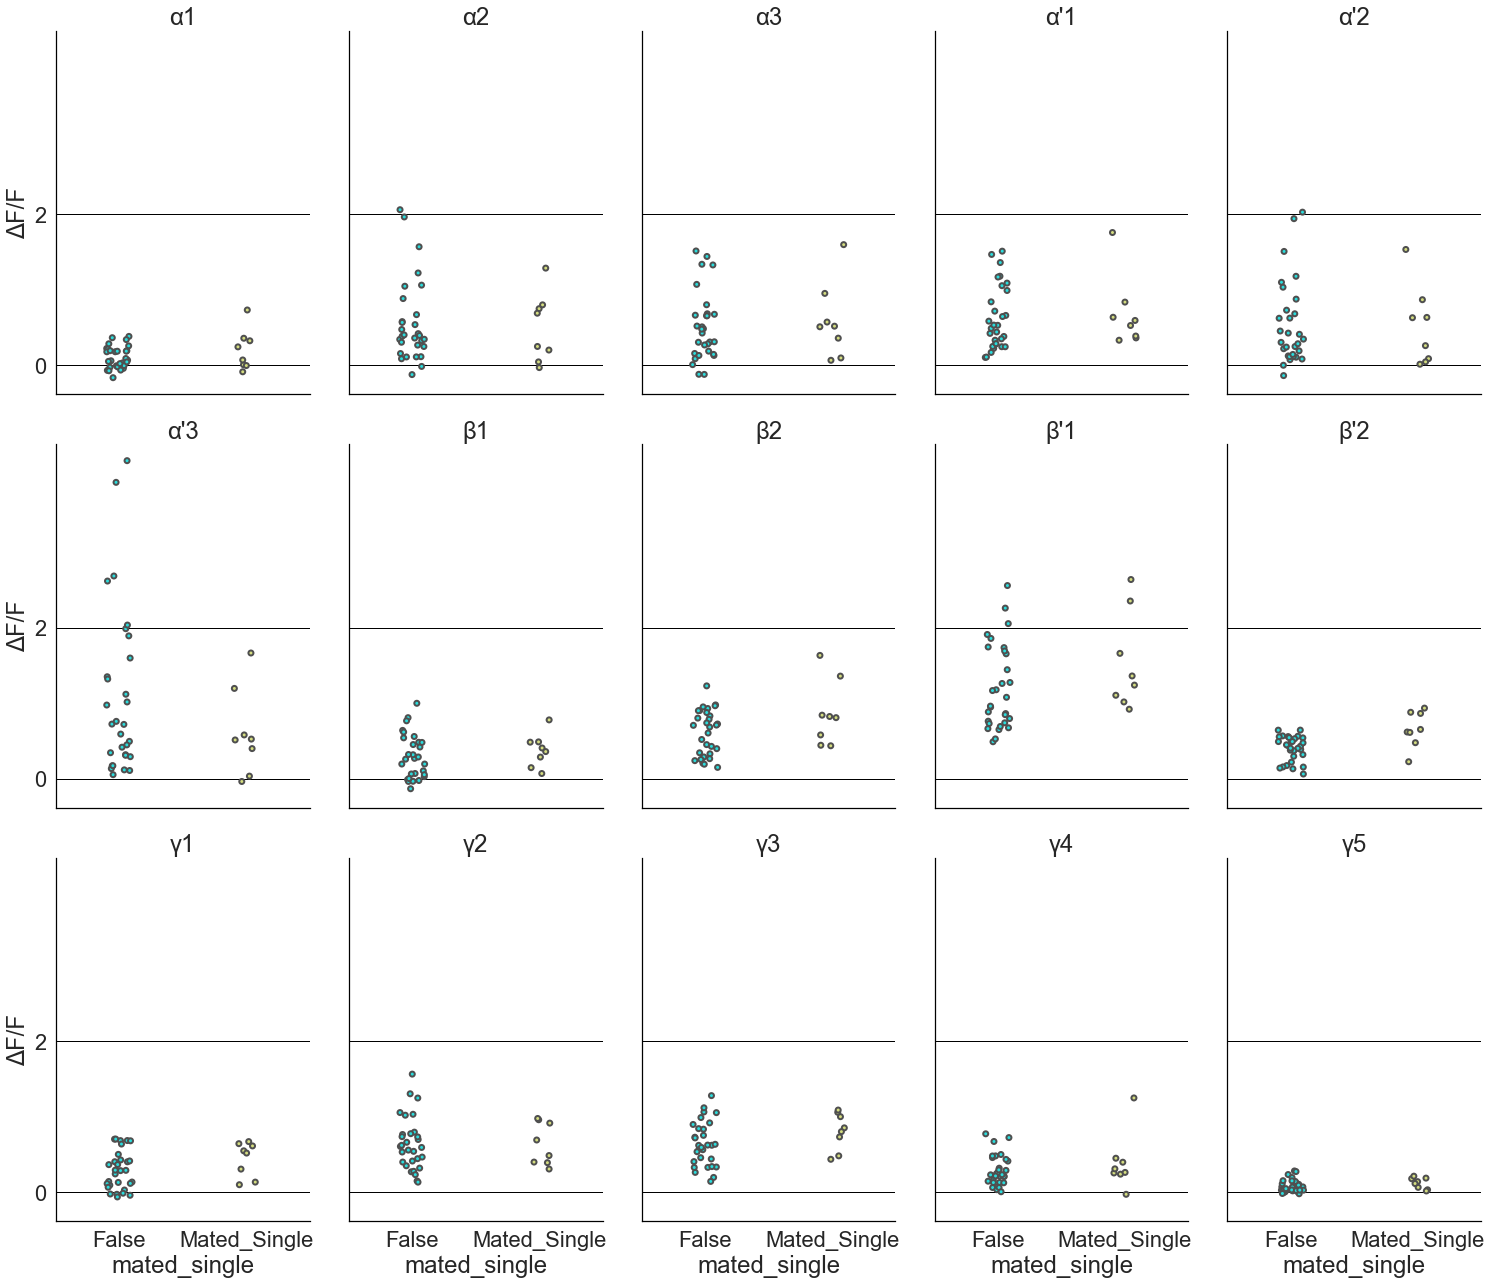

In [91]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=2)

#lobe_data_end=lobe_data[1:4900]
data_cva=lobe_data[lobe_data['stimulus']=='cVA']
data_cva_mated=data_cva[data_cva['virgin']==False]
data_cva_mated=data_cva_mated.fillna(False)

b = sns.catplot(x="mated_single", y="ΔF/F", col="greek_lobe",col_wrap=5,data=data_cva_mated,palette='rainbow',linewidth=2, height=6, aspect=.7)

b.set_titles("{col_name}") # set new labels
plt.yticks([0,2])
plt.savefig('LobesMatedSingle.svg')
plt.savefig('LobesMatedSingle.png')

In [ ]:
len(lobe_data[lobe_data['stimulus']=='cVA'])

In [ ]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=3)


b = sns.catplot(x="virgin", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data[lobe_data['stimulus']=='cVA'],palette='rainbow',linewidth=2, height=6, aspect=.7,kind='box')

b.set_titles("{col_name}") # set new labels

plt.yticks([0,2])
plt.savefig('LobesMated.svg')
plt.savefig('LobesMated.png')

In [92]:
data_tastequi=pd.read_excel("Taste_data.xlsx",'quinine').transpose()

data_tastesuc=pd.read_excel("Taste_data.xlsx",'sucrose').transpose()

db1=data_tastesuc.stack().reset_index()

db2=data_tastequi.stack().reset_index()

#taste_mean=pd.concat([suc_mean,qui_mean], ignore_index=True, sort=False)

db2['taste']='quinine'
db1['taste']='sucrose'

data_taste = pd.concat([db1, db2], ignore_index=True, sort=False)

data_taste.columns = ['lobe', 'num','df_f','taste']

data_taste['df_f_norm']=0
data_taste['norm']=0

Nums=[170,110,29,177,176,173,188,151,174,175,168,170]

for taste in ['quinine', 'sucrose']:
    for i in Nums:
        if any((data_taste['num']==i) & (data_taste['taste']==taste)):
            subData=data_taste[data_taste['num']==i][data_taste['taste']==taste]
            Norm=np.float(subData[subData['lobe']=='Mean'].df_f)
            data_taste.loc[(data_taste['num']==i) & (data_taste['taste']==taste),'norm']=Norm


data_taste.df_f_norm=data_taste.df_f-data_taste.norm

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=2)


b = sns.catplot(x="taste", y="df_f", col="lobe",col_wrap=5,data=data_taste,linewidth=2, height=6, aspect=.7,palette='RdBu')

b.set_titles("{col_name}") # set new labels
#plt.ylim([-3,6])
plt.savefig('DataTaste.svg')

In [ ]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=2)


b = sns.catplot(x="taste", y="df_f_norm", col="lobe",col_wrap=5,data=data_taste,linewidth=2, height=6, aspect=.7,kind='box',palette='RdBu')

b.set_titles("{col_name}") # set new labels
plt.ylim([-0.05,0.25])
plt.savefig('DataTaste.svg')

In [ ]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=3)

b = sns.catplot(x="dorsal_to_ventral", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data,palette='rainbow',linewidth=2, kind="box",height=6, aspect=.7)

b.set_titles("{col_name}") # set new labels
plt.yticks([0,2])
plt.savefig('LobesDirection.svg')

In [ ]:
data=pd.read_csv("ResultWalk.txt",
           delim_whitespace=True,
           skipinitialspace=True,
                header=None)

In [ ]:
WalkRsq=np.zeros((15,7))
WalkBeta=np.zeros((15,7))
for j in range(7):
    for i in range(15):
        WalkRsq[i,j]=data[j][2+i*3]
        WalkBeta[i,j]=data[j][1+i*3]        

In [ ]:
DataWalk=pd.DataFrame(WalkRsq.T,columns=LobesGreek)
DataWalkbetas=pd.DataFrame(WalkBeta.T,columns=LobesGreek)

In [ ]:
import matplotlib as mpl
mpl.rcParams['lines.markersize'] =200
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
b = sns.stripplot(data=DataWalk, color='black',jitter=False,size=10)
b.set(xlabel='Compartment',ylabel='R square')

b.xaxis.set_ticks_position('top')
b.xaxis.set_label_position('top')
plt.savefig('WalkSqr.svg')      
plt.savefig('WalkSqr.png')
plt.show()

In [93]:
import matplotlib as mpl
mpl.rcParams['lines.markersize'] =200
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
b = sns.stripplot(data=DataWalkbetas, color='black',jitter=False,size=10)
b.set(xlabel='Compartment',ylabel='Correlation coef.')

b.xaxis.set_ticks_position('top')
b.xaxis.set_label_position('top')
plt.savefig('WalkBetas.svg')      
plt.savefig('WalkBetas.png')  
plt.show()

NameError: name 'DataWalkbetas' is not defined

<Figure size 1152x432 with 0 Axes>

In [ ]:
np.mean(DataWalkbetas.values,0)

In [ ]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})

sns.set_context("notebook",font_scale=3)

b = sns.catplot(x="dorsal_to_ventral", y="ΔF/F", col="greek_lobe",col_wrap=5,data=lobe_data,palette='rainbow',linewidth=2, kind="box",height=6, aspect=.7)

b.set_titles("{col_name}") # set new labels
plt.yticks([0,2])
plt.savefig('LobesDirection.svg')

In [ ]:
#CI
#import statsmodels.stats.api as sms
#sms.DescrStatsW(lobe_data[lobe_data.lobe=="a1"]["adaptnormperc"]).tconfint_mean()